### 安装
- Python基本环境： pip install matplotlib
- conda  不用装了
- jupyter ： !pip install matplotlib


## 作业
- 把我今天写的代码，你至少要写2遍

In [1]:
# 导入你所需要的库
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### 折线图

In [12]:
data = pd.read_excel("折线图.xlsx")
data.head()

,日期,总销售额,FBA销售额,自配送销售额
0,42964,3211.87,1596.16,1615.71
1,42965,3376.35,1777.65,1598.70
2,42966,3651.55,2304.97,1239.75
3,42967,2833.74,1431.51,1402.23
4,42968,3232.76,1568.85,1663.91


In [13]:
# Excel中的日期，是从1900年1月1日开始存储的，那么这一天将会以数字的形式存储成1
# origin 这个参数的意思是从哪一天开始计算
# Excel有一个时间计数上的bug，1900年的2月份给记成了29天
data["日期"]=pd.to_datetime(data["日期"]-2,unit="d",origin=pd.Timestamp("1900-01-01"))

data.head()

,日期,总销售额,FBA销售额,自配送销售额
0,2017-08-17,3211.87,1596.16,1615.71
1,2017-08-18,3376.35,1777.65,1598.70
2,2017-08-19,3651.55,2304.97,1239.75
3,2017-08-20,2833.74,1431.51,1402.23
4,2017-08-21,3232.76,1568.85,1663.91


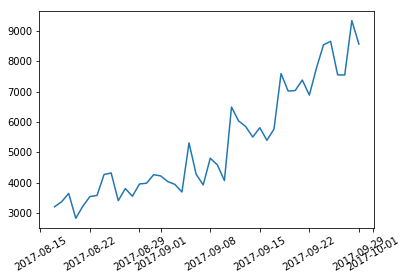

In [17]:
# 去除警告日志提醒的显示
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


# 设置x轴的角度倾斜
plt.xticks(rotation=30)

# 绘制折线图  第一个参数是x轴，第二个参数是y轴
plt.plot(data["日期"],data["总销售额"])
plt.show()

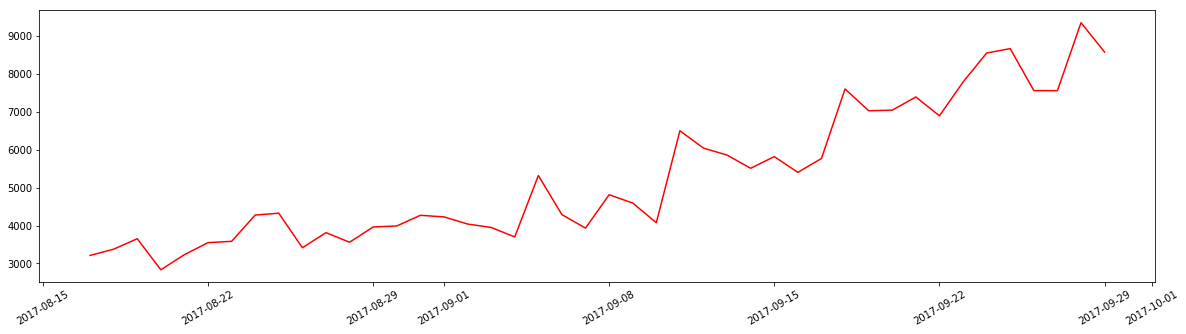

In [26]:


# 设置画布的大小  figsize 设置长宽
plt.figure(figsize=(20,5))
# 设置x轴的角度倾斜
plt.xticks(rotation=30)
# color设置颜色
plt.plot(data["日期"],data["总销售额"],color="red")
plt.show()

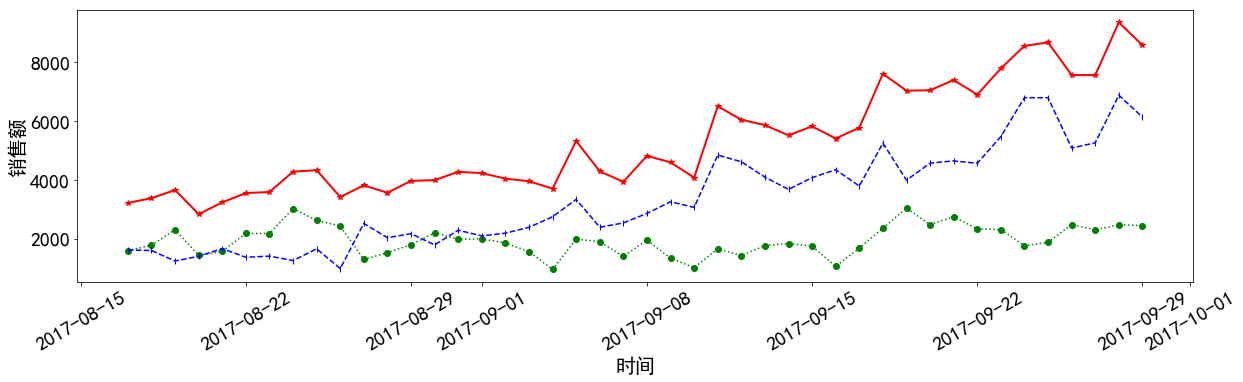

In [45]:
## 一个图上画多个折线图

# linewidth 这个参数是设置线的宽度的
# linestyle 这个参数是设置线的样式的
# marker  这个是设置拐点标记样式的
plt.figure(figsize=(20,5))
plt.plot(data["日期"],data["总销售额"],color="red", linewidth=2, marker="*")
plt.plot(data["日期"],data["FBA销售额"],color="green",marker="o",linestyle=":")
plt.plot(data["日期"],data["自配送销售额"],color="blue", marker="|", linestyle="--")
# 设置x轴的角度倾斜
plt.xticks(rotation=30)

# 解决中文显示问题
font = {
    "family":"SimHei",  #  这个是设置字体的
    "size":"20"  #  这个是设置字体大小的
}

plt.rc("font",**font)
# 设置x轴的标签
plt.xlabel("时间")
# 设置y轴的标签
plt.ylabel("销售额")
plt.show()

In [46]:
### 柱状图
data = pd.read_excel("长尾分布.xlsx")
data.head()

,排序,销量
0,1,16000
1,2,15000
2,3,5500
3,4,5000
4,5,4951


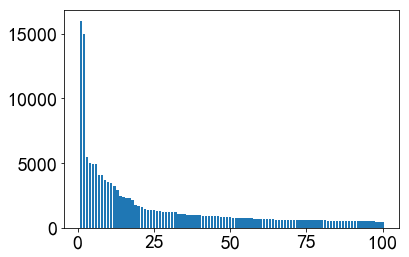

In [48]:
plt.bar(data["排序"],data["销量"])
plt.show()

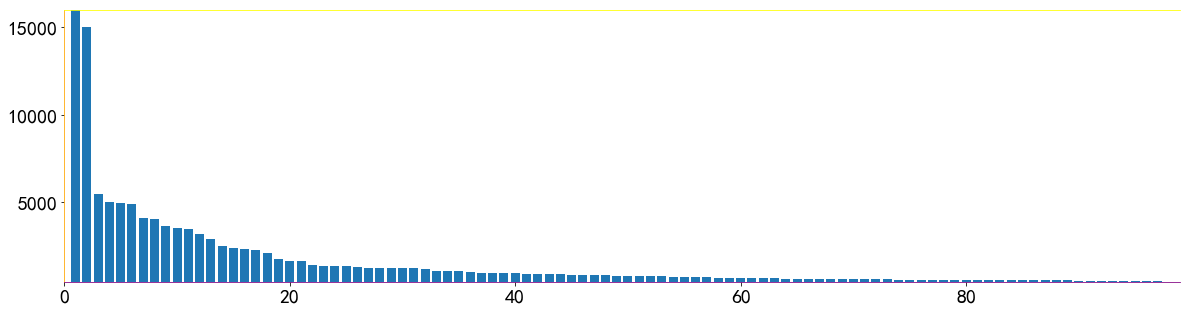

In [60]:
# 
plt.figure(figsize=(20,5))
plt.bar(data["排序"],height=data["销量"])

# 现在我要做的是对四周的四条线进行修改
ax = plt.gca()
# 设置右侧颜色
ax.spines["right"].set_color("white")
# 修改左侧颜色
ax.spines["left"].set_color("orange")
# 修改上边颜色
ax.spines["top"].set_color("yellow")
# 修改下边颜色
ax.spines["bottom"].set_color("purple")

# 设置x轴刻度
plt.xlim(data.index.values[0],data.index.values[-1])

# 设置y轴的刻度
plt.ylim(np.min(data["销量"]),np.max(data["销量"]))

plt.show()

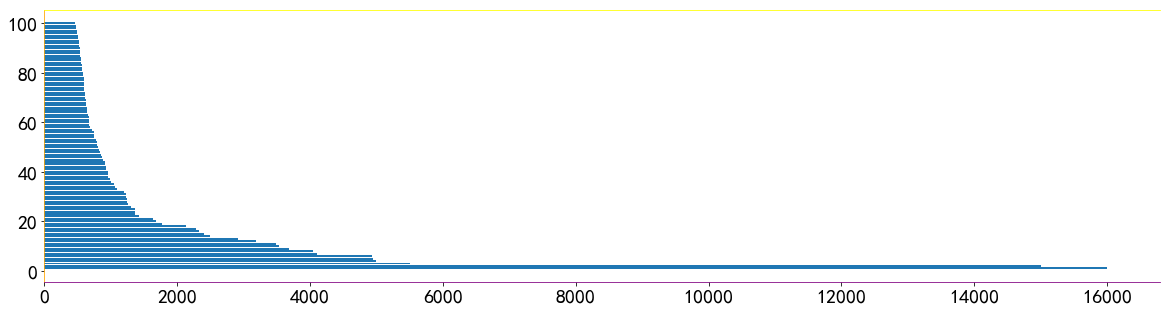

In [67]:
## 条形图

# 
plt.figure(figsize=(20,5))
plt.barh(data["排序"],data["销量"])

# 现在我要做的是对四周的四条线进行修改
ax = plt.gca()
# 设置右侧颜色
ax.spines["right"].set_color("white")
# 修改左侧颜色
ax.spines["left"].set_color("orange")
# 修改上边颜色
ax.spines["top"].set_color("yellow")
# 修改下边颜色
ax.spines["bottom"].set_color("purple")

plt.show()


### 饼图

In [68]:
data = pd.read_excel("折线图.xlsx")
data.head()

,日期,总销售额,FBA销售额,自配送销售额
0,42964,3211.87,1596.16,1615.71
1,42965,3376.35,1777.65,1598.70
2,42966,3651.55,2304.97,1239.75
3,42967,2833.74,1431.51,1402.23
4,42968,3232.76,1568.85,1663.91


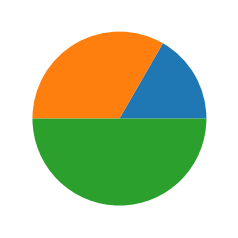

In [70]:
# 饼图最简单的绘制方式
plt.pie([1,2,3])
plt.show()

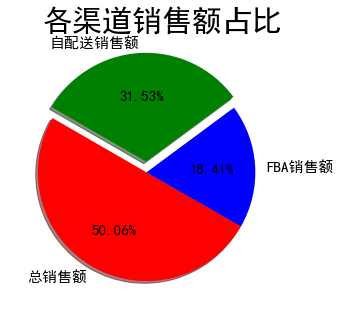

In [100]:
# 根据数据进行数据运算后，再进行饼图绘制
plt.figure(figsize=(20,5))
font = {
    "family":"SimHei",
    "size":"15"
}
plt.rc("font",**font)

# 把三个渠道的总销售额计算出来
sum_sale = np.sum(data["总销售额"])
FBA_sale = np.sum(data["FBA销售额"])
self_sale = np.sum(data["自配送销售额"])

### 配图颜色使用的原则： 尽量使用跟公司色调一致的颜色

plt.pie([sum_sale,FBA_sale,self_sale]
        ,labels=["总销售额","FBA销售额","自配送销售额"]  # 对每一个数据进行说明
        ,colors=["red","blue","green"]    # 颜色设置
        ,shadow=True         # 阴影显示
        ,labeldistance = 1.1   # 设置label距图的距离
        ,autopct="%.2f%%"   # 设置百分比的显示  
        ,startangle=150   # 旋转角度
        ,explode = [0,0,0.1]  # 哪一个部分要凸显出来
       )

plt.title("各渠道销售额占比", fontdict={"family":"SimHei",'size':"30"},loc="right")
plt.show()



### 散点图

In [101]:
### 气泡图是由散点图演化而来

data = pd.read_excel("气泡图.xlsx")
data.head()

,产品编号,广告ROI,平均单个订单成本,订单额
0,1,15.0,6,700
1,2,12.0,30,8400
2,3,1.0,7,350
3,4,5.0,10,500
4,5,6.5,25,4000


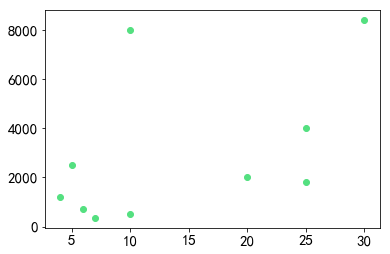

In [107]:
plt.scatter(data["平均单个订单成本"],data["订单额"]
           ,color="#54E080")
plt.show()

In [105]:
## 随机生成RGB颜色  RGB颜色组成就是 一个# 加上任意的6个十六进制的字符组成的
import random
def random_colors(numbers):
    colors = []
    number = 0
    while number < numbers:
        color_arr = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
        color = ""
        for i in range(6):
            color += color_arr[random.randint(0,len(color_arr)-1)]
        
        color = "#"+color
        colors.append(color)
        
        number+=1
    return colors

colors = random_colors(10)
colors

['#5FE8AA',
 '#D196F8',
 '#B4251C',
 '#BF7656',
 '#402807',
 '#263399',
 '#54E080',
 '#8E5715',
 '#F3FA4A',
 '#1DE517']

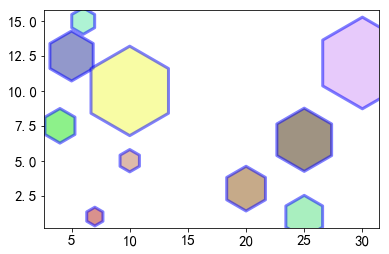

In [118]:
plt.scatter(data["平均单个订单成本"],data["广告ROI"]
            ,s =data["订单额"]    # 这个是设置球的大小
            ,color=colors          # 这个是设置球的颜色
            ,marker="h"       # 这个是设置球的形状
            ,linewidths=3    # 这个是设置边框的宽度
            ,edgecolors='b'  # 这个是设置边框的颜色，如果你没有设置颜色，那么边框就跟球的颜色一样
            ,alpha=0.5       # 这个是设置透明度
           )
plt.show()

In [128]:
### 气泡图颜色渐变

import random
data1 = data.sort_values("订单额")
x = []
for i in data1.index.values:
    x.append(random.randint(100,1000))
data1["人力投入"]=x
data1


,产品编号,广告ROI,平均单个订单成本,订单额,人力投入
2,3,1.0,7,350,484
3,4,5.0,10,500,956
0,1,15.0,6,700,555
9,10,7.5,4,1200,151
6,7,1.0,25,1800,278
7,8,3.0,20,2000,592
5,6,12.5,5,2500,337
4,5,6.5,25,4000,909
8,9,10.0,10,8000,172
1,2,12.0,30,8400,580


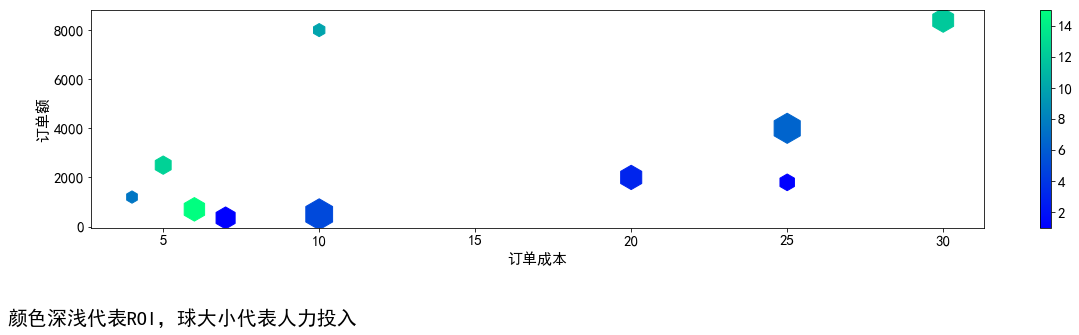

In [135]:
plt.figure(figsize=(20,4))


plt.scatter(data1["平均单个订单成本"],data1["订单额"]
            ,s=data1["人力投入"]   # 控制球大小，人力投入越多的，球越大
            ,marker="h"
            ,c=data1["广告ROI"] # 这样设置颜色后，就是ROI越高的颜色越深 
            ,cmap="winter"         
           )



plt.colorbar()

plt.xlabel("订单成本")
plt.ylabel("订单额")


plt.text(0,-4000,s="颜色深浅代表ROI，球大小代表人力投入", fontdict={"size":20})
plt.show()

In [136]:
### 直方图
data = pd.read_excel("直方图.xlsx")
data.head()



,ship-state,数量,占据比例
0,CA,273,0.094268
1,FL,211,0.072859
2,TX,205,0.070787
3,NY,179,0.061809
4,IL,126,0.043508


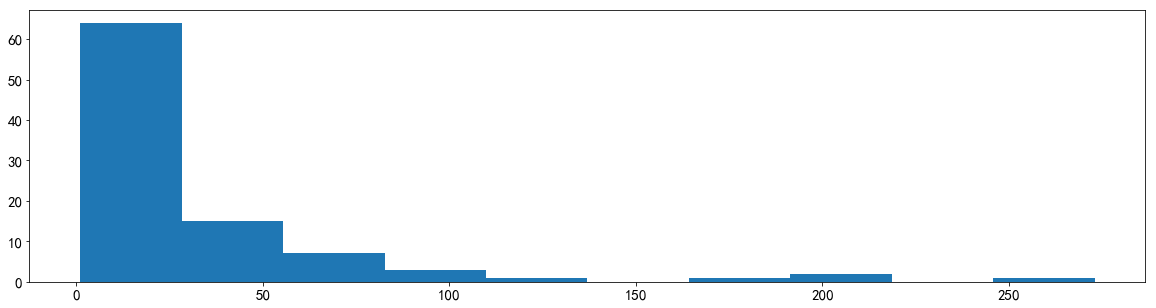

In [137]:
plt.figure(figsize=(20,5))
plt.hist(data["数量"])
plt.show()

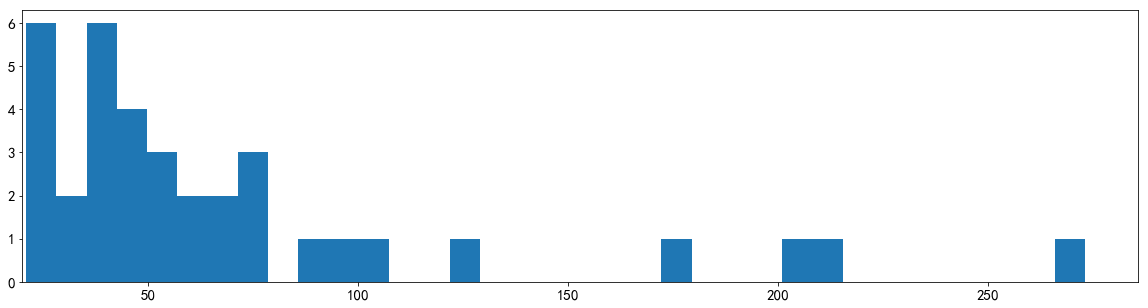

In [142]:
# 频数的直方图

plt.figure(figsize=(20,5))
data1 = data[data["数量"]>20]
plt.hist(data1["数量"]
        ,bins=data1.index.values[-1]    # 这个参数是要展示的数目，也就是x轴上有多少
         ,align = "mid"   # left mid right  左 中 右
        )

plt.xlim(20)
plt.show()

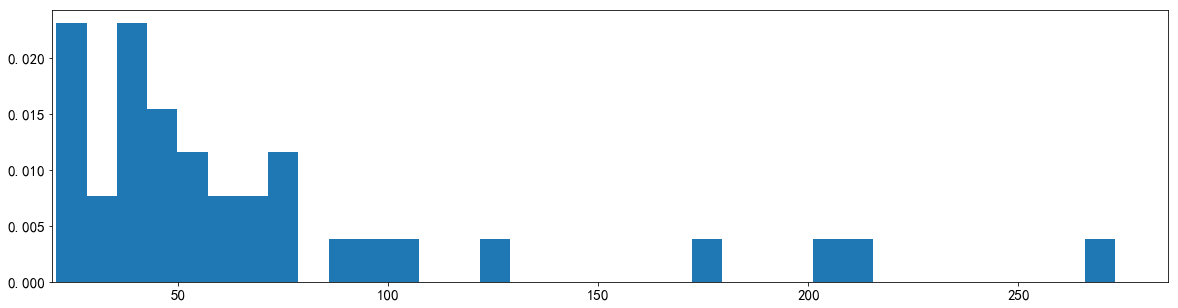

In [143]:
## 频率直方图


plt.figure(figsize=(20,5))
data1 = data[data["数量"]>20]
plt.hist(data1["数量"]
        ,bins=data1.index.values[-1]    # 这个参数是要展示的数目，也就是x轴上有多少
         ,align = "mid"   # left mid right  左 中 右
         ,density=True   # 这个值设置成True就变成频率，如果没有，那么就是频数
        )

plt.xlim(20)
plt.show()

## 箱型图

In [144]:
data = pd.read_excel("长尾分布.xlsx")
data.head()

,排序,销量
0,1,16000
1,2,15000
2,3,5500
3,4,5000
4,5,4951


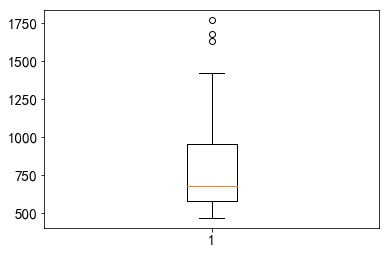

In [147]:
plt.boxplot(data[data["销量"]<2000]["销量"])
plt.show()

In [ ]:
# 横线上边的可以看做是异常值，也叫离群点。  
# 横线是上限值
# 依次往下是上4分位、中位数、下4分位数、下限
# 上4分位数的意思是全部数据中有4分之一的数据比它大
# 下4分位数的意思是全部数据中有4分之一的数据比它小
# 中位数的意思就是位于中间的数据
# 上4分位减去下4分位数代表着4分位的间距，那么异常值（离群点）就是大于  (上四分位 + 1.5 * 四分位间距) 或小于(下4分位 - 1.5*四分位间距)的数字
# 上限值就是等于（上4分位 + 1.5 * 四分位间距）的值

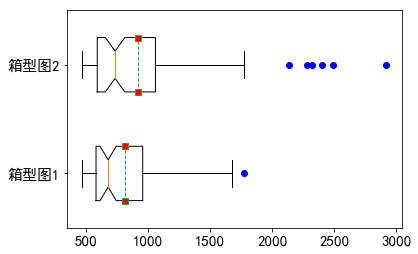

In [166]:
## 箱型图也可以同时绘制多个
data1 = [data[data["销量"]<2000]["销量"],data[data["销量"]<3000]["销量"]]
plt.boxplot(data1  # 这个列表中包含了多少个列表元素，那么就会绘制多少个箱型图
           ,notch=True  # 这个参数的意思是是不是要在箱型图中展示一个凹口
           ,sym="b" # 指定异常点展示的形状
           ,vert=False # 这个参数的意思是是不是要将箱型图进行垂直摆放，True就是垂直，False就是横着
            ,whis=2  # 我们用这个参数来定义异常，默认是1.5这个参数也就是上下四分位距离的倍数
            ,labels=["箱型图1","箱型图2"] # 加一个标签说明
            ,showmeans=True   # 这个参数的意思是是否展示平均值
            ,meanline=True  # 这个参数的意思是以一个线的形式来展示平均值，但需要注意meanline的生效需要showmeans=True
            ,showfliers=True  # 这个参数的意思是是否显示异常值
            ,meanprops=dict(markerfacecolor="r", marker="s")
            ,widths=0.5
           )
plt.show()

### 子图绘制

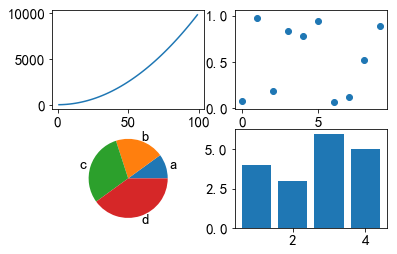

In [174]:

x = np.arange(1,100)

# 第一个图就是两行，两列中的左上的那个图，也就是第一个  221的意思
plt.subplot(221)
plt.plot(x,x*x)

# 这个图是绘制右上的那一个，是把整个画布看做是2行2列的图形 绘制第二个
plt.subplot(222)
plt.scatter(np.arange(0,10), np.random.rand(10))

plt.subplot(223)
plt.pie(x=[1,2,3,4],labels=['a','b','c','d'])


plt.subplot(224)
plt.bar(x=[1,2,3,4],height=[4,3,6,5])

plt.show()

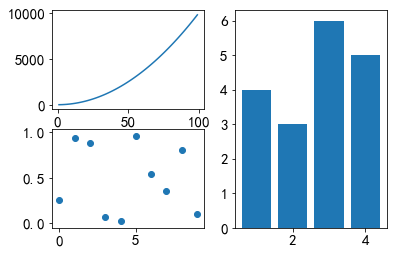

In [179]:
x = np.arange(1,100)

# 第一个图就是两行，两列中的左上的那个图，也就是第一个  221的意思
plt.subplot(221)
plt.plot(x,x*x)

# 这个图是绘制右上的那一个，是把整个画布看做是2行2列的图形 绘制第二个
plt.subplot(223)
plt.scatter(np.arange(0,10), np.random.rand(10))

plt.subplot(122)
plt.bar(x=[1,2,3,4],height=[4,3,6,5])

plt.show()

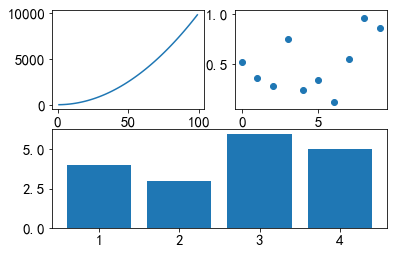

In [180]:
x = np.arange(1,100)

# 第一个图就是两行，两列中的左上的那个图，也就是第一个  221的意思
plt.subplot(221)
plt.plot(x,x*x)

# 这个图是绘制右上的那一个，是把整个画布看做是2行2列的图形 绘制第二个
plt.subplot(222)
plt.scatter(np.arange(0,10), np.random.rand(10))

plt.subplot(212)
plt.bar(x=[1,2,3,4],height=[4,3,6,5])

plt.show()

In [181]:
data = pd.read_csv("特斯拉股票.csv")
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
1,2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2,2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
3,2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
4,2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


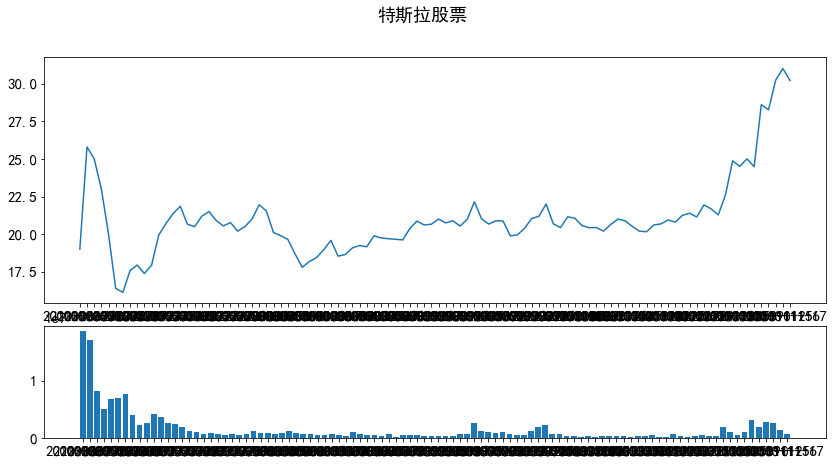

In [190]:
data1 = data.head(100)
plt.figure(figsize=(14,7))

plt.suptitle("特斯拉股票")
fig1 = plt.subplot(3,1,(1,2))
fig1.plot(data1["Date"],data1["Open"])

fig2 = plt.subplot(3,1,3)
fig2.bar(data1["Date"],data1["Volume"])
plt.show()
